In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

In [2]:
# Load dataset
data = pd.read_csv('HealthData(in).csv')

In [3]:
# Define features and target variable
X = data.drop('charges', axis=1)
y = data['charges']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age', 'bmi', 'children']),
        ('cat', OneHotEncoder(drop='first'), ['sex', 'smoker', 'region'])
    ]
)

# Apply preprocessing to features
X_processed = preprocessor.fit_transform(X)

In [4]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (1070, 8)
Testing set size: (268, 8)


In [5]:
model = LinearRegression()
model.fit(X_train, y_train)

# Display model coefficients and intercept
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

Model Coefficients: [ 3.60914902e+03  2.05488506e+03  5.12478869e+02 -1.85916916e+01
  2.36511289e+04 -3.70677326e+02 -6.57864297e+02 -8.09799354e+02]
Model Intercept: 8946.081982340915


In [6]:
# Make predictions on test set
y_pred = model.predict(X_test)

# Evaluate performance using R^2 and RMSE
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"R^2 Score: {r2:.3f}")
print(f"RMSE: ${rmse:,.2f}")

R^2 Score: 0.784
RMSE: $5,796.28


C:\Users\27713\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


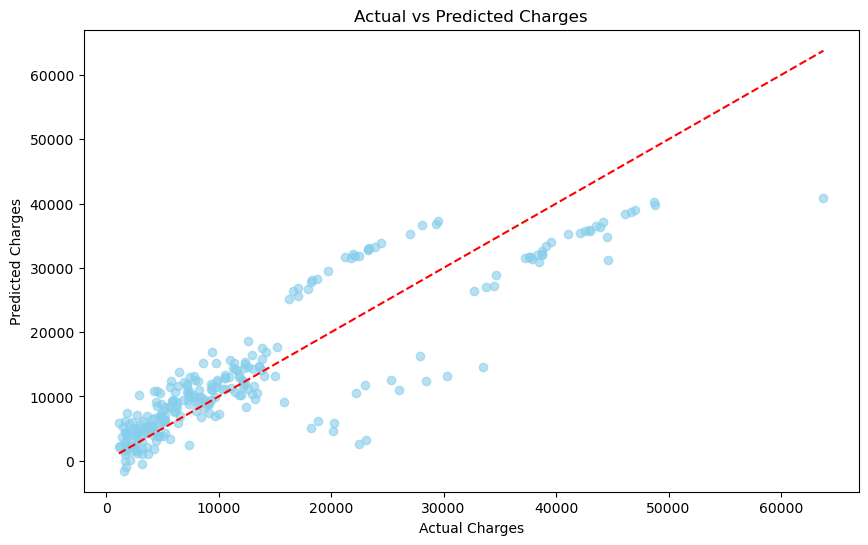

In [7]:
# Plot actual vs predicted charges
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='skyblue')
plt.plot([y_test.min(), y_test.max()], [ y_test.min(), y_test.max()], 'r--') # Reference line (y=x)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges')
plt.show()

### Exporting the Model

In [9]:
import joblib

In [10]:
joblib.dump(model, 'insurance_model.pkl')
joblib.dump(preprocessor, 'insurance_preprocessor.pkl')

['insurance_preprocessor.pkl']

# Streamlit Library

In [12]:
import streamlit as st
import pandas as pd
import numpy as np
import joblib

In [13]:
# Load the trained model and preprocessor
model = joblib.load('insurance_model.pkl')
preprocessor = joblib.load('insurance_preprocessor.pkl')

st.title("Insurance Charges Predictor")

st.write("Enter the details below to predict insurance charges:")

# User input widgets
age = st.number_input("Age", min_value=18, max_value=100, value=30)
sex = st.selectbox("Sex", options=['male', 'female'])
bmi = st.number_input("BMI", min_value=10.0, max_value=60.0, value=25.0, step=0.1)
children = st.number_input("Number of Children", min_value=0, max_value=5, value=0)
smoker = st.selectbox("Smoker", options=['yes', 'no'])
region = st.selectbox("Region", options=['northeast', 'northwest', 'southeast', 'southwest'])

if st.button("Predict Charges"):
    # Prepare input data as a DataFrame
    input_df = pd.DataFrame({
        'age': [age],
        'sex': [sex],
        'bmi': [bmi],
        'children': [children],
        'smoker': [smoker],
        'region': [region]
    })

    # Preprocess input
    input_preprocessed = preprocessor.transform(input_df)

    # Predict
    prediction = model.predict(input_preprocessed)[0]

    st.success(f"Predicted Insurance Charges: ${prediction:,.2f}")

2025-05-03 23:18:35.970 
  command:

    streamlit run C:\Users\27713\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-05-03 23:18:35.974 Session state does not function when running a script without `streamlit run`
